In [0]:
!pip install geopandas
!pip install gmaps

In [0]:
import pandas as pd
import geopandas as gp
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import statsmodels.formula.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
plt.style.use("bmh")
# -- mount google drive
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
park['Closed?'].unique()

array([nan, 'Under Construction.', 'Closed / No Construct.',
       'Partial Constr./Rest of Site Rated.',
       'Partial Constr./Rest of Site Rated',
       'Partial Closure/Rest of Site Rated', 'Under Construction',
       'Southern side Partial Constr./Rest of Site Rated.',
       'Under Construction. External features rated.',
       'Closed / No Construct. External features rated.', '.'],
      dtype=object)

In [0]:
fname = "drive/My Drive/group_three_final_project/data/Parks_Inspection_Program___Inspections.csv"
park = pd.read_csv(fname)
park.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,B045,04,14861,Fall,4,10/14/1999 12:00:00 AM,02:24 PM,02:31 PM,1999,32,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
1,B029-ZN03,08,4024,Fall,4,10/17/2002 12:00:00 AM,10:41 AM,11:22 AM,2002,39,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
2,B094,15,15570,Fall,1,09/10/2001 12:00:00 AM,11:17 AM,11:28 AM,2001,45,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
3,Q427,12,12362,Fall,6,11/18/2002 12:00:00 AM,12:00 PM,12:37 PM,2002,6,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
4,B223IC,02,42919,Spring,2,03/14/2006 12:00:00 AM,11:49 AM,11:49 AM,2006,7,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN


In [0]:
park.columns

Index(['Prop ID', 'AMPSDistrict', 'Inspection ID', 'Season', 'Round', 'Date', 'BeginInspection', 'EndInspection', 'Inspection Year', 'inspector', 'inspector2', 'Overall Condition', 'Cleanliness', 'Safety Condition', 'Structural Condition', 'VisitorCount', 'Closed?', 'Comments', 'InspectionType', 'inspAddedDate'], dtype='object')

In [0]:
park_conditions = park[['Overall Condition', 'Cleanliness', 'Safety Condition', 'Structural Condition']].dropna()
display(park_conditions.head())


,Overall Condition,Cleanliness,Safety Condition,Structural Condition
41559,U,A,U,A
41608,U,A,U,A
41647,A,A,A,A
41718,U,A,U,A
41840,A,A,A,A


Overall Condition: ['U' 'A' 'N']
Cleanliness: ['A' 'U' 'N']
Safety Condition: ['U' 'A' 'N']
Structural Condition: ['A' 'U' 'N']


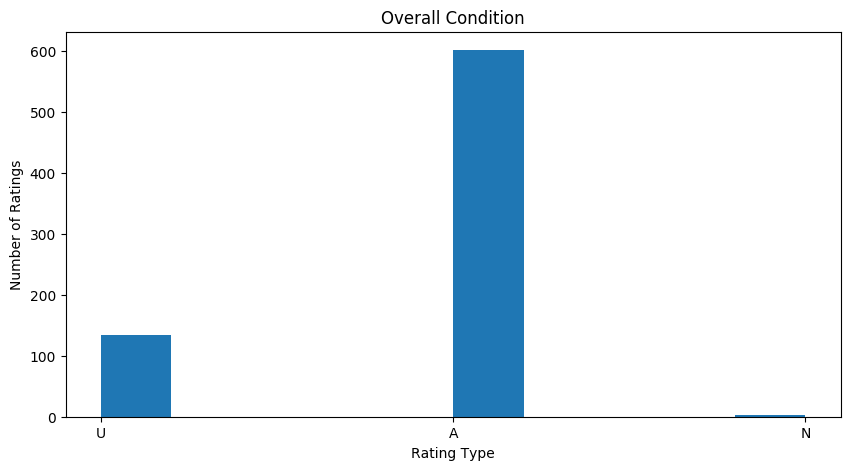

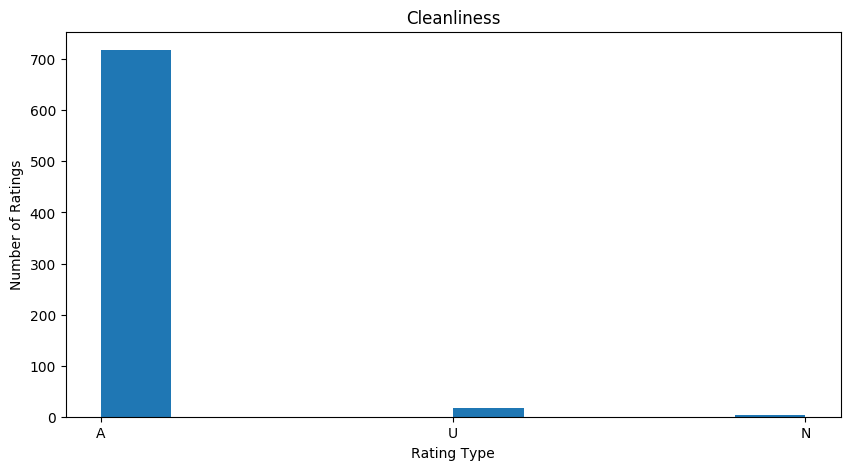

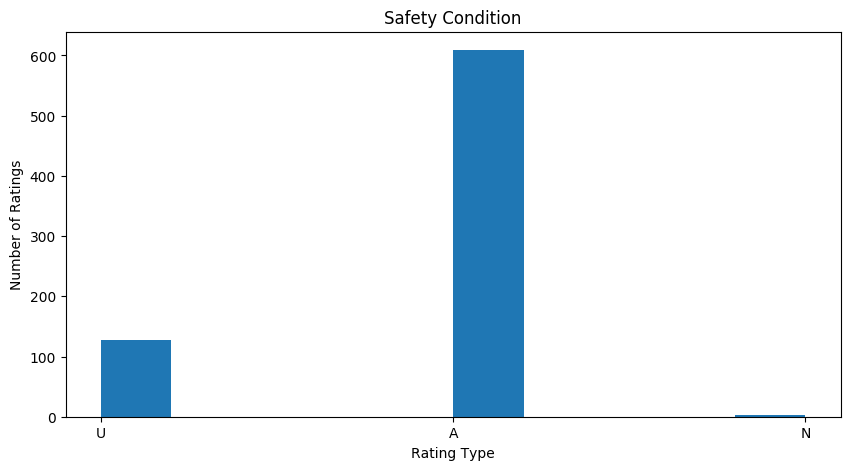

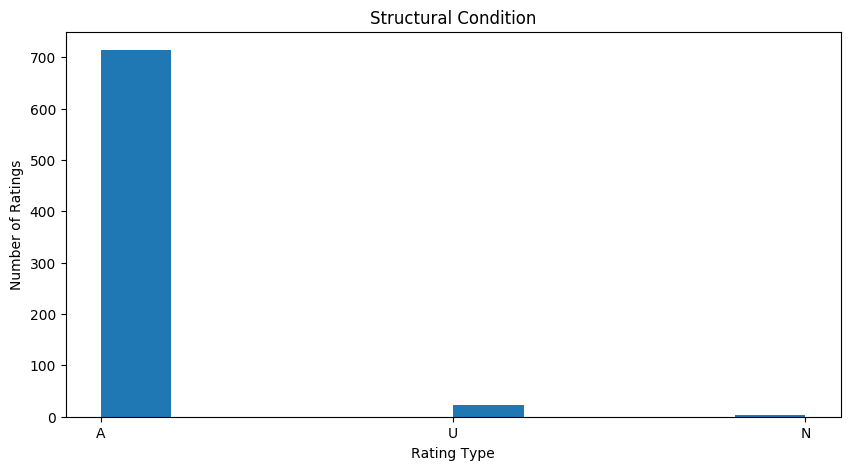

In [306]:
for col in ['Overall Condition', 'Cleanliness', 'Safety Condition', 'Structural Condition']:
  print('{}: {}'.format(col, park_conditions[col].unique()))
  # -- plot the histogram of all trips
  fig, ax = plt.subplots(figsize=[10, 5])
  hst     = ax.hist(park_conditions[col], bins=10)
  ax.set_title(col)
  xlab    = ax.set_xlabel("Rating Type")
  ylab    = ax.set_ylabel("Number of Ratings")

In [0]:
park_conditions['Cleanliness_idx'] = park_conditions['Cleanliness'].str.replace('A', '1').replace('U', '-1').replace('N', '0')
park_conditions['Cleanliness_idx'] = park_conditions['Cleanliness_idx'].astype(int)

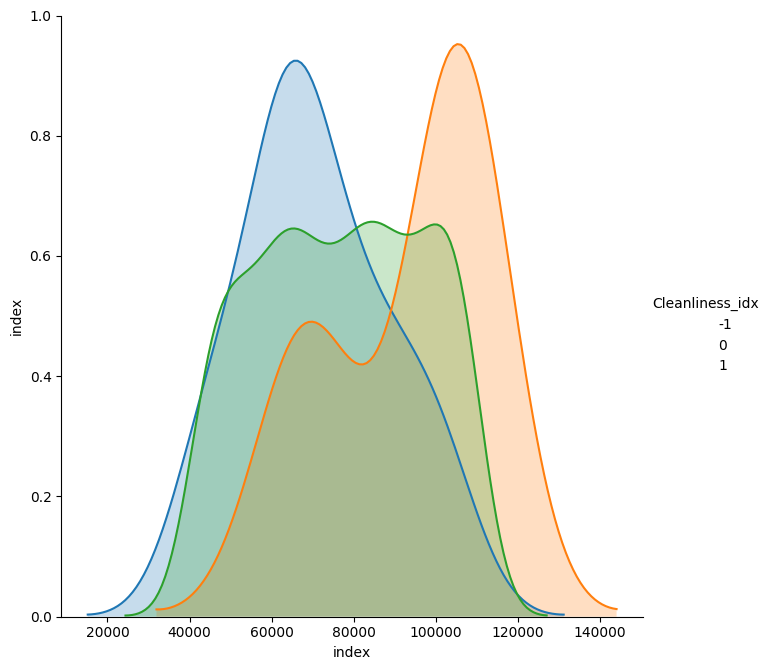

In [307]:
sns.pairplot(park_conditions.reset_index(), hue='Cleanliness_idx', height=6.5)

In [0]:
fname = "drive/My Drive/group_three_final_project/data/Parks_Inspection_Program___Inspections.csv"
park = pd.read_csv(fname)
park.head()

properties = gp.read_file("https://data.cityofnewyork.us/api/geospatial/k2ya-ucmv?method=export&format=GeoJSON")
properties.head()

inspection = pd.read_csv("drive/My Drive/group_three_final_project/data/Parks_Inspection_Program___All_Sites.csv")
inspection.head()

observations = pd.read_csv('drive/My Drive/group_three_final_project/data/Parks_Inspection_Program___PIP_Plus.csv')

gpark = properties.merge(park, left_on="gispropnum", right_on="Prop ID")
gpark.head()

df = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv")
df.head()

burr = gp.read_file('drive/My Drive/group_three_final_project/data/Copy of Borough Boundaries.geojson')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
gpark = properties.merge(park, left_on="gispropnum", right_on="Prop ID")
gpark.head()

df = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv")
df.head()

burr = gp.read_file('drive/My Drive/group_three_final_project/data/Copy of Borough Boundaries.geojson')

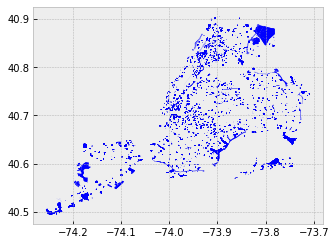

In [0]:
gpark.plot()

(-74.28344659564597, -73.68169993935035, 40.4739693497242, 40.92552428180413)

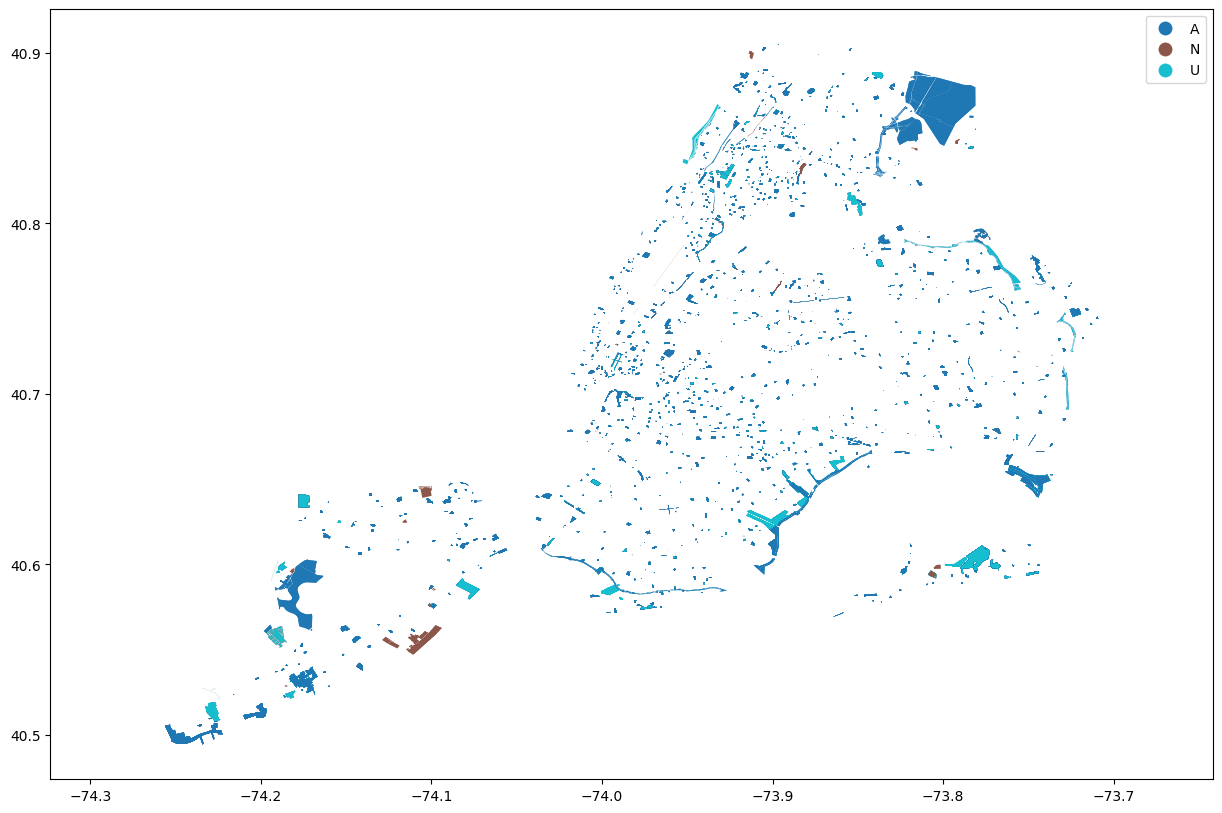

In [0]:

plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
gpark.plot('Cleanliness', ax=ax, legend=True)
ax.axis("equal")

In [216]:
gpark.columns

Index(['us_congres', 'mapped', 'global_id', 'zipcode', 'acres', 'location', 'typecatego', 'commission', 'url', 'permitpare', 'eapply', 'parentid', 'gispropnum', 'acquisitio', 'retired', 'subcategor', 'jurisdicti', 'objectid', 'communityb', 'name311', 'permitdist', 'pip_ratabl', 'department', 'precinct', 'permit', 'omppropid', 'gisobjid', 'signname', 'address', 'nys_assemb', 'class', 'nys_senate', 'councildis', 'borough', 'waterfront', 'geometry', 'Prop ID', 'AMPSDistrict', 'Inspection ID', 'Season', 'Round', 'Date', 'BeginInspection', 'EndInspection', 'Inspection Year', 'inspector', 'inspector2', 'Overall Condition', 'Cleanliness', 'Safety Condition', 'Structural Condition', 'VisitorCount', 'Closed?', 'Comments', 'InspectionType', 'inspAddedDate'], dtype='object')

In [0]:
gpark['Date'] = pd.to_datetime(gpark['Date'])

In [273]:
gpark['Date'].head()

0   2006-11-13
1   2006-07-12
2   2007-04-12
3   2007-10-24
4   1907-02-23
Name: Date, dtype: datetime64[ns]

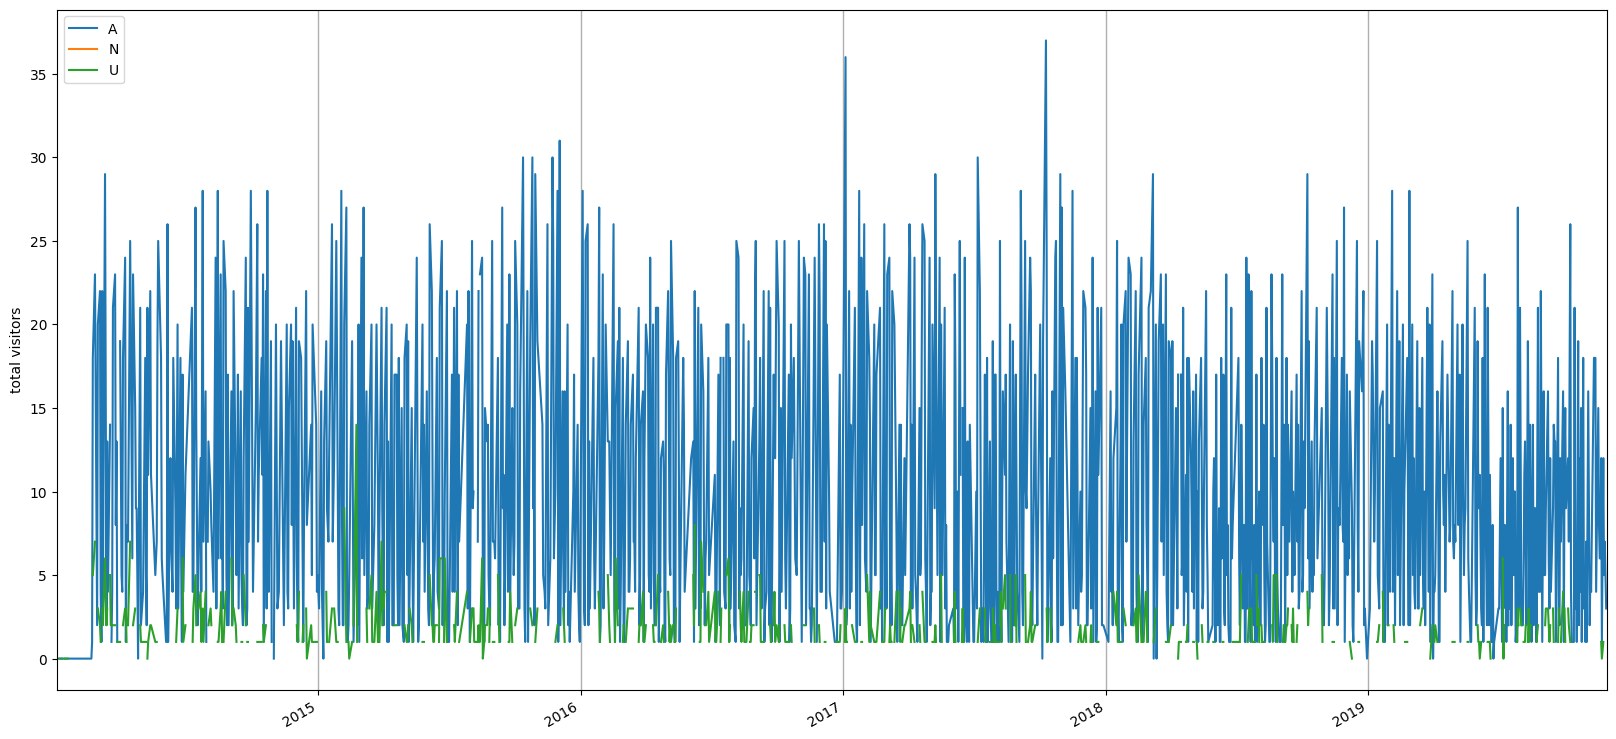

In [283]:
gpark_clean_date = gpark[gpark['Date'] > '2013-12-31'].groupby(['Cleanliness', 'Date']).count()
# -- plot 
ax = gpark_clean_date.unstack('Cleanliness').plot(y = 'VisitorCount', figsize = [20,10])
ax.grid(axis="x", which="major", lw=1)
ax.set_xlabel("")
ax.set_ylabel("total visitors")
ax.legend(loc="upper left")

In [265]:
gpark_overall = gpark.groupby(['Cleanliness', 'Season']).count()
gpark_overall.head()

us_congres  mapped  global_id  zipcode  acres  location  typecatego  commission    url  permitpare  eapply  parentid  gispropnum  acquisitio  retired  subcategor  jurisdicti  objectid  communityb  name311  permitdist  pip_ratabl  department  precinct  permit  omppropid  gisobjid  signname  address  nys_assemb  class  nys_senate  councildis  borough  waterfront  geometry  Prop ID  AMPSDistrict  Inspection ID  Round   Date  BeginInspection  EndInspection  Inspection Year  inspector  inspector2  Overall Condition  Safety Condition  Structural Condition  VisitorCount  Closed?  Comments  InspectionType  inspAddedDate
Cleanliness Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
A           Fall         10989   10989      10989    10989  10989     10989       10989       10332  10970       10986   10985     10989       10989       10425    10989       10986       10989     10989       10989    10989       10986       10989       10989     10989   10958      10989     10989     10989     6193       10989  10989       10989       10985    10989       10989     10989    10989         10989          10989  10989  10989            10988          10988            10989      10989         158              10989                 3                     3          3477      583      2482           10989           6746
            Spring       10684   10684      10684    10684  10684     10684       10684       10032  10668       10681   10679     10684       10684       10104    10684       10679       10684     10684       10684    10684       10681       10684       10684     10684   10651      10684     10684     10684     5970       10684  10684       10684       10678    10684       10684     10684    10684         10684          10684  10684  10684            10683          10682            10684      10684          77              10684                 4                     4          3359      545      2536           10684           6465
            Summer       11419   11419      11419    11419  11419     11419       11419       10784  11403       11419   11419     11419       11419       10814    11419       11412       11419     11419       11419    11419       11419       11419       11419     11419   11388      11419     11419     11419     6359       11419  11419       11419       11410    11419       11419     11419    11419         11419          11419  11419  11419            11419          11417            11419      11419          56              11419                 4                     4          3332      513      2637           11419           6593
            Winter       10120   10120      10120    10120  10120     10120       10120        9493  10106       10120   10120     10120       10120        9559    10120       10114       10120     10120       10120    10120       10120       10120       10120     10120   10089      10120     10120     10120     5647       10120  10120       10120       10116    10120       10120     10120    10120         10120          10120  10120  10120            10118          10118            10120      10120         118              10120                 5                     5          2847      538      2915           10120           6106
N           Fall           229     229        229      229    229       229         229         222    228         229     229       229         229         223      229         22

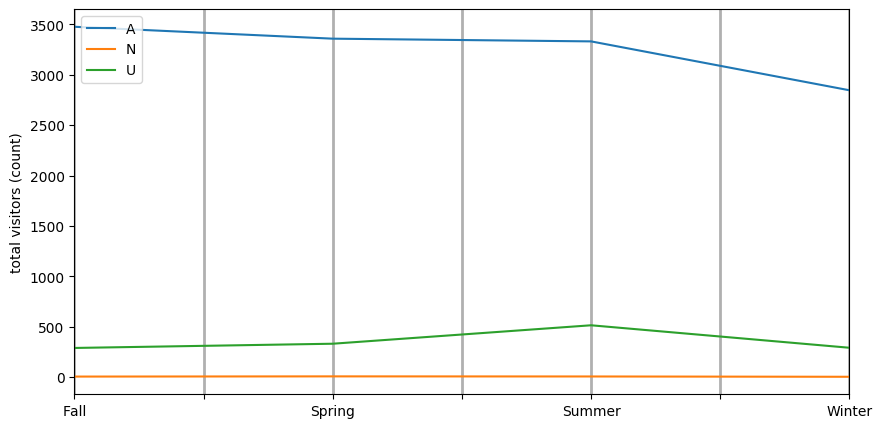

In [254]:
# -- plot 
ax = gpark_overall.unstack(['Cleanliness']).plot(y = 'VisitorCount', figsize = [10,5])
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total visitors (count)")
ax.legend(loc="upper left")


In [244]:
gpark_season_zip = gpark.groupby(['Cleanliness', 'Season', 'zipcode']).count()
gpark_season_zip.head()

us_congres  mapped  global_id  acres  location  typecatego  commission  url  permitpare  eapply  parentid  gispropnum  acquisitio  retired  subcategor  jurisdicti  objectid  communityb  name311  permitdist  pip_ratabl  department  precinct  permit  omppropid  gisobjid  signname  address  nys_assemb  class  nys_senate  councildis  borough  waterfront  geometry  Prop ID  AMPSDistrict  Inspection ID  Round  Date  BeginInspection  EndInspection  Inspection Year  inspector  inspector2  Overall Condition  Safety Condition  Structural Condition  VisitorCount  Closed?  Comments  InspectionType  inspAddedDate
Cleanliness Season zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
A           Fall   10001            32      32         32     32        32          32          32   32          32      32        32          32          32       32          32          32        32          32       32          32          32          32        32      32         32        32        32       32          32     32          32          32       32          32        32       32            32             32     32    32               32             32               32         32           0                 32                 0                     0            11        0         7              32             23
                   10002           173     173        173    173       173         173         173  173         173     173       173         173         166      173         173         173       173         173      173         173         173         173       173     173        173       173       173      133         173    173         173         173      173         173       173      173           173            173    173   173              173            173              173        173           3                173                 0                     0            62       13        47             173            113
                   10003            56      56         56     56        56          56          56   56          56      56        56          56          56       56          56          56        56          56       56          56          56          56        56      56         56        56        56       30          56     56          56          56       56          56        56       56            56             56     56    56               56             56               56         56           1                 56                 0                     0            14        3        15              56             31
                   10004            10      10         10     10        10          10          10   10          10      10        10          10          10       10          10          10        10          10       10          10          10          10        10      10         10        10        10        0          10     10          10          10       10          10        10       10            10             10     10    10               10             10               10         10           0                 10                 0                     0             4        0         1              10              8
                   10005            11      11         11     11        11          11          11   11          11      11        11          11          11       11          11          11        11          11

In [248]:
# -- plot 
ax = df_taxi_geo_ts.unstack('geo').plot(y = 'trips', figsize = [20,10])
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total trips []")
ax.legend(loc="upper left")


ValueError: ignored

In [0]:
gpark_overall = gpark.groupby('Overall Condition')
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
gpark.plot('Cleanliness', ax=ax, legend=True)
ax.axis("equal")

In [203]:
gpark.head()

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,47236,Fall,6,11/13/2006 12:00:00 AM,12:01 PM,12:17 PM,2006,12,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
1,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,44981,Summer,3,07/12/2006 12:00:00 AM,11:26 AM,11:50 AM,2006,3,NaN,A,A,NaN,NaN,NaN,NaN,Missing fence leading to non-parks construction site.,PIP,NaN
2,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,50162,Spring,4,04/12/2007 12:00:00 AM,01:27 PM,01:58 PM,2007,1,NaN,U,U,NaN,NaN,NaN,NaN,NaN,PIP,NaN
3,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,53857,Fall,5,10/24/2007 12:00:00 AM,12:28 PM,02:33 PM,2007,1,NaN,N,N,NaN,NaN,NaN,Under Construction.,NaN,PIP,NaN
4,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,49271,Winter,6,02/23/1907 12:00:00 AM,10:41 AM,10:49 AM,1907,13,NaN,N,N,NaN,NaN,NaN,NaN,NaN,PE PRKSTAT,NaN


In [202]:
gpark['Overall Condition'].head()

0    A
1    A
2    U
3    N
4    N
Name: Overall Condition, dtype: object

(-74.28344659564597, -73.68169993935035, 40.4739693497242, 40.92552428180413)

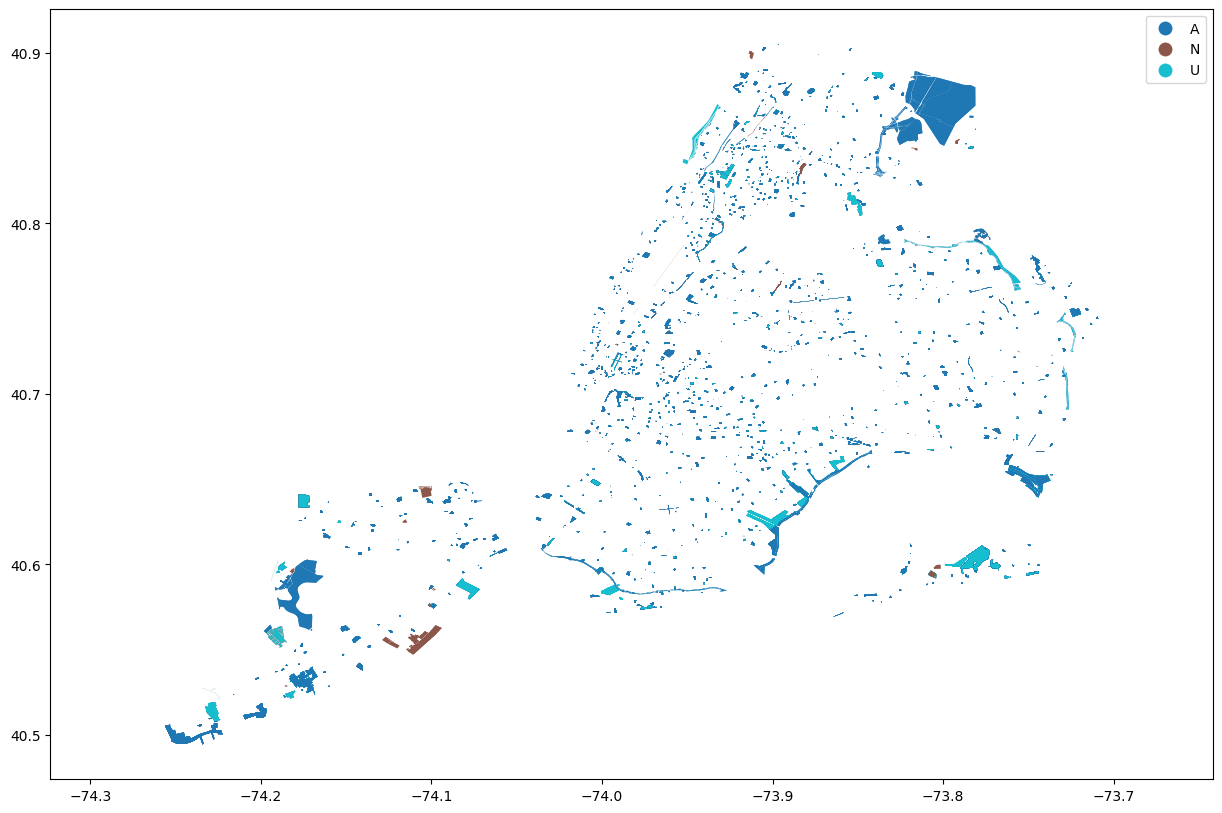

In [0]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
gpark.plot('Cleanliness', ax=ax, legend=True)
ax.axis("equal")

In [0]:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv")
df.head()

In [0]:
gpark.dropna()\

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate


In [0]:
for col in ['Overall Condition', 'Cleanliness', 'Safety Condition', 'Structural Condition']:

(-74.28344659564597, -73.68169993935035, 40.4739693497242, 40.92552428180413)

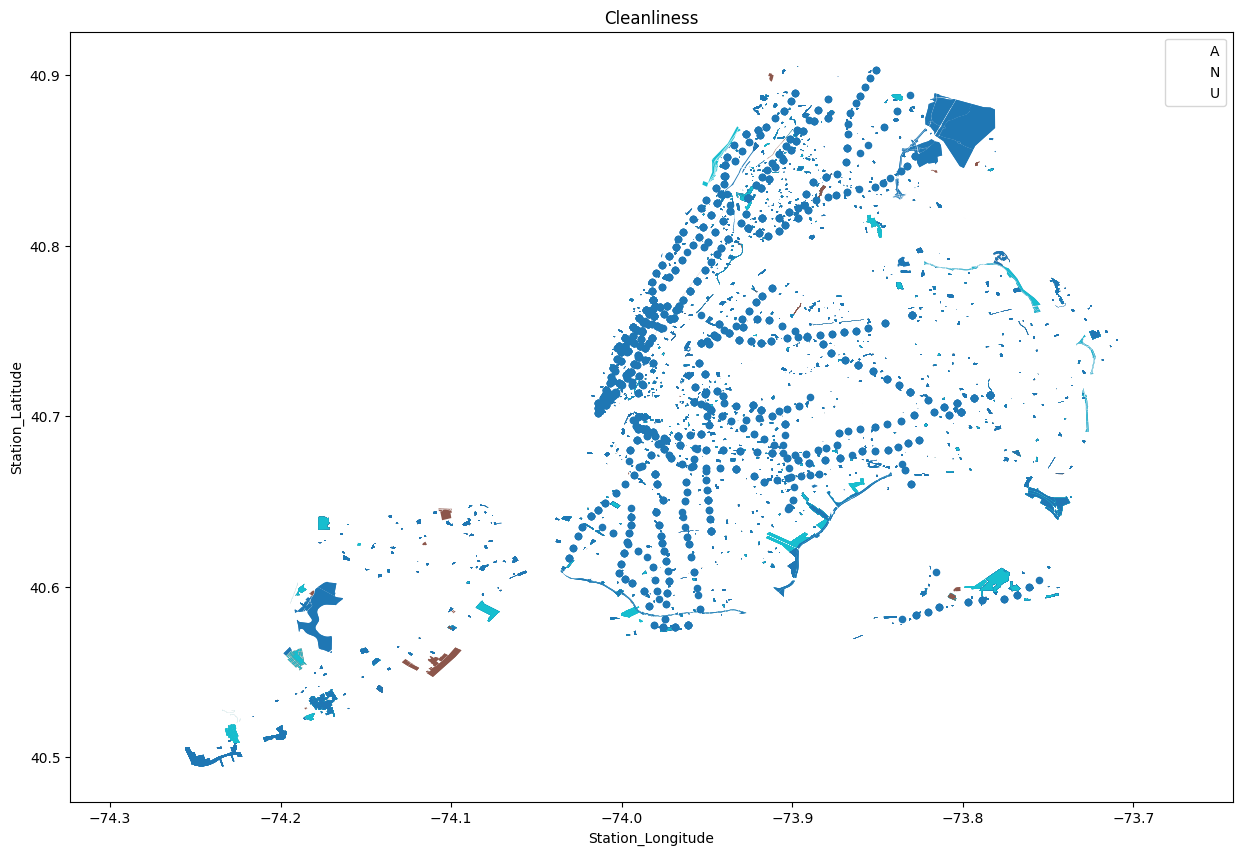

In [0]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(15, 10))

gpark.plot('Cleanliness', ax=ax, legend=True)
df.plot.scatter(x='Station_Longitude', y='Station_Latitude', ax=ax)
#burr.plot(color="lightgreen", ax=ax)
ax.set_title('Cleanliness')
ax.axis("equal")

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(-74.04676539926905, -73.73951560073097, 40.556582717175, 40.922669282825005)

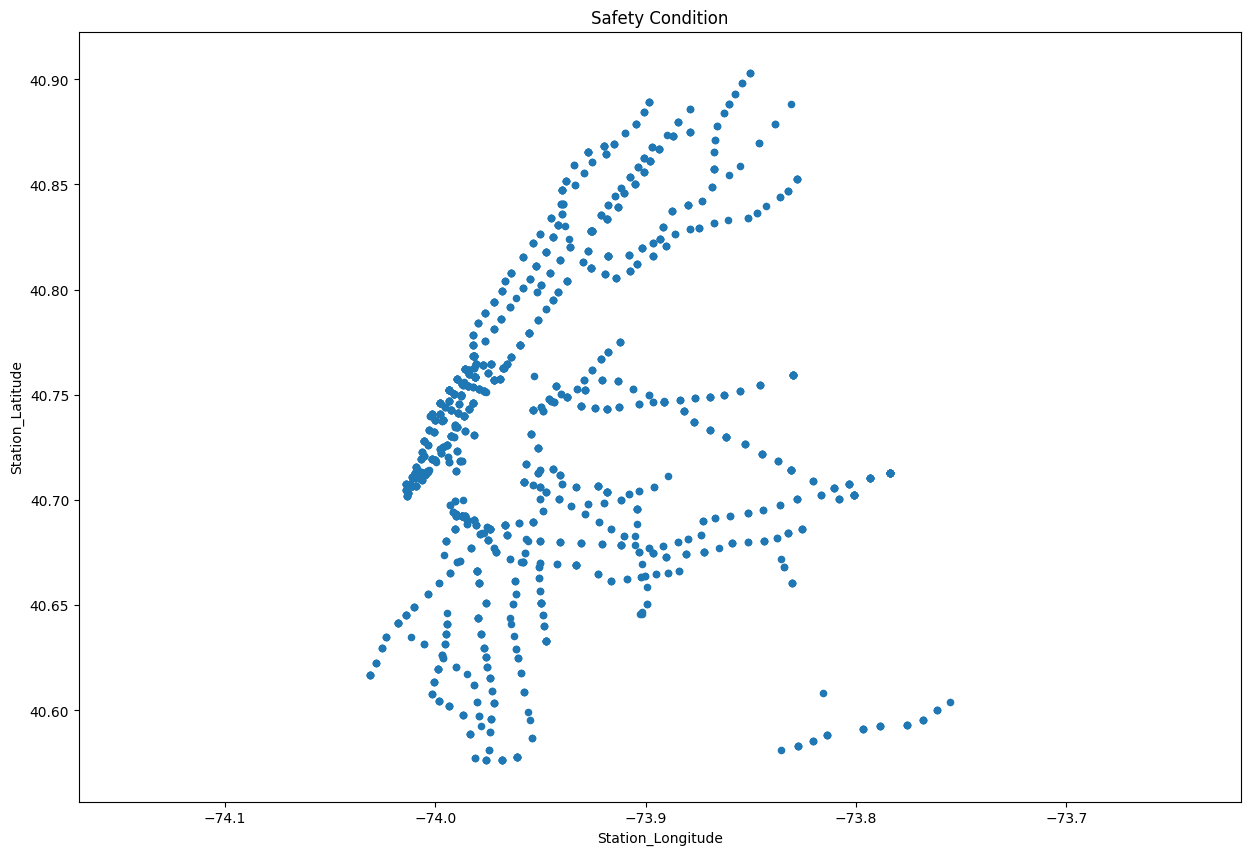

In [0]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(15, 10))

gpark.dropna().plot('Safety Condition', ax=ax, legend=True)
df.plot.scatter(x='Station_Longitude', y='Station_Latitude', ax=ax)

ax.set_title('Safety Condition')
ax.axis("equal")

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(-74.04676539926905, -73.73951560073097, 40.556582717175, 40.922669282825005)

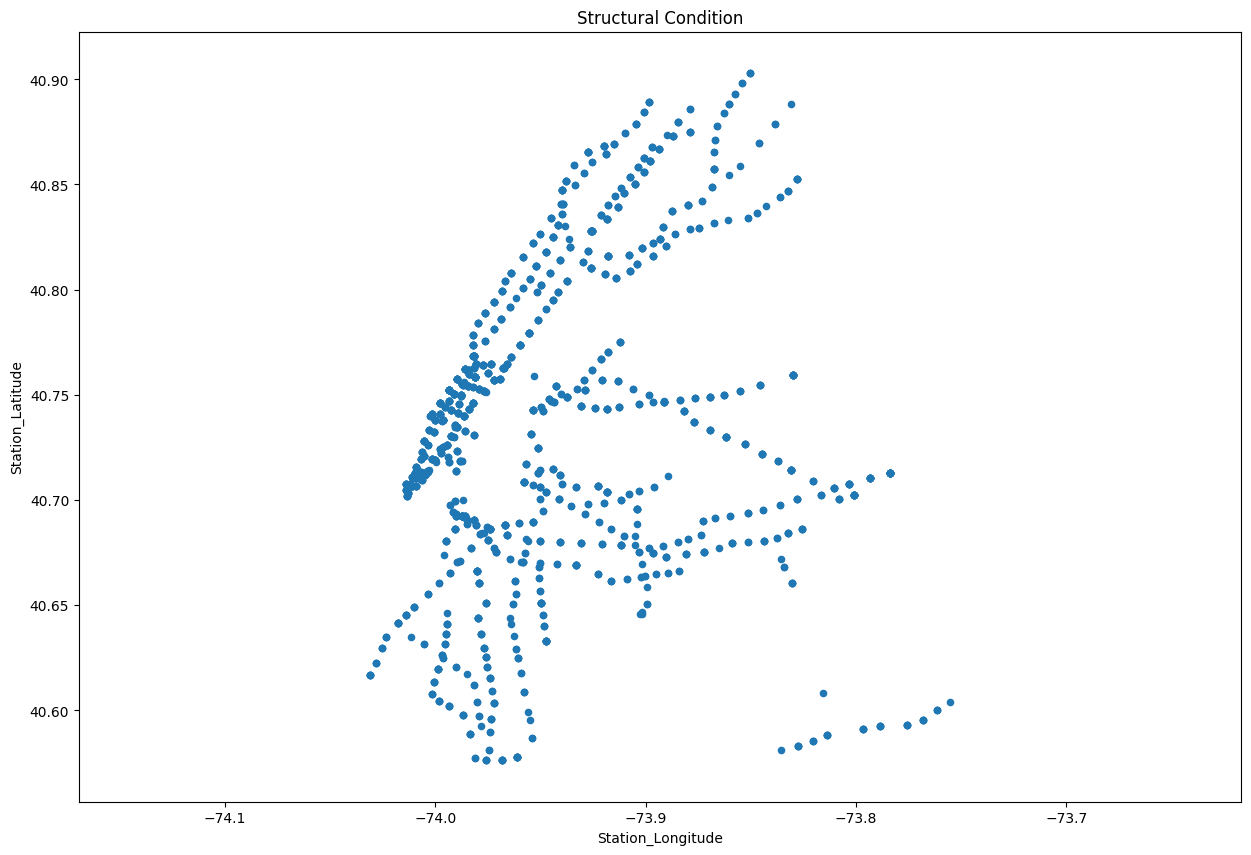

In [0]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(15, 10))

gpark.dropna().plot('Structural Condition', ax=ax, legend=True)
burr.plot(color="lightgreen", ax=ax)
df.plot.scatter(x='Station_Longitude', y='Station_Latitude', ax=ax)

ax.set_title('Structural Condition')
ax.axis("equal")

In [0]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(15, 10))

gpark.dropna().plot('Overall Condition', ax=ax, legend=True)
#burr.plot(color="lightgreen", ax=ax)
df.plot.scatter(x='Station_Longitude', y='Station_Latitude', ax=ax)

ax.set_title('Overall Condition')
ax.axis("equal")

In [0]:
gpark.head(1)

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,47236,Fall,6,11/13/2006 12:00:00 AM,12:01 PM,12:17 PM,2006,12,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN


In [0]:
gpark_overall = gpark.groupby(["Overall Condition"]).count()
display(gpark_overall.dropna())

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
Overall Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,39821,39821,39821,39821,39821,39821,39821,37445,39759,39815,39812,39821,39821,37609,39821,39802,39821,39821,39821,39821,39815,39821,39821,39821,39699,39821,39821,39821,21737,39821,39821,39821,39799,39821,39821,39821,39821,39821,39821,39821,39821,39821,39818,39814,39821,39821,370,39821,12,12,11867,2022,9644,39821,23777
N,1642,1642,1642,1642,1642,1642,1642,1597,1639,1642,1642,1642,1642,1593,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1636,1642,1642,1642,1031,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1635,1642,1642,1642,29,1642,0,0,131,806,828,1642,396
U,8669,8669,8669,8669,8669,8669,8669,8204,8662,8669,8669,8669,8669,8440,8669,8665,8669,8669,8669,8669,8669,8669,8669,8669,8660,8669,8669,8669,5924,8669,8669,8669,8666,8669,8669,8669,8669,8669,8669,8669,8669,8669,8668,8668,8669,8669,240,8669,4,4,2471,442,2368,8669,5369


In [0]:
gpark_overall = gpark.groupby(["Overall Condition", "zipcode"]).count()
display(gpark_overall.dropna())

us_congres  mapped  global_id  acres  location  typecatego  commission  url  permitpare  eapply  parentid  gispropnum  acquisitio  retired  subcategor  jurisdicti  objectid  communityb  name311  permitdist  pip_ratabl  department  precinct  permit  omppropid  gisobjid  signname  address  nys_assemb  class  nys_senate  councildis  borough  waterfront  geometry  Prop ID  AMPSDistrict  Inspection ID  Season  Round  Date  BeginInspection  EndInspection  Inspection Year  inspector  inspector2  Cleanliness  Safety Condition  Structural Condition  VisitorCount  Closed?  Comments  InspectionType  inspAddedDate
Overall Condition zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
A                 10001                124     124        124    124       124         124         124  124         124     124       124         124         124      124         124         124       124         124      124         124         124         124       124     124        124       124       124      124         124    124         124         124      124         124       124      124           124            124     124    124   124              124            124              124        124           0          124                 0                     0            41        3        27             124             86
                  10002                588     588        588    588       588         588         588  588         588     588       588         588         562      588         588         588       588         588      588         588         588         588       588     588        588       588       588      437         588    588         588         588      588         588       588      588           588            588     588    588   588              588            588              588        588           5          588                 0                     0           172       48       173             588            347
                  10003                255     255        255    255       255         255         255  255         255     255       255         255         255      255         255         255       255         255      255         255         255         255       255     255        255       255       255      131         255    255         255         255      255         255       255      255           255            255     255    255   255              255            255              255        255           3          255                 0                     0            67        8        53             255            147
                  10004                 58      58         58     58        58          58          58   58          58      58        58          58          58       58          58          58        58          58       58          58          58          58        58      58         58        58        58        0          58     58          58          58       58          58        58       58            58             58      58     58    58               58             58               58         58           0           58                 0                     0            20        0         6              58             44
                  10005                 37      37         37     37        37          37          37   37          37      37        37          37          37       37          

In [0]:
con_a = gpark[gpark["Overall Condition"] == "A"]
con_u = gpark[gpark["Overall Condition"] == "U"]
con_n = gpark[gpark["Overall Condition"] == "N"]

No handles with labels found to put in legend.


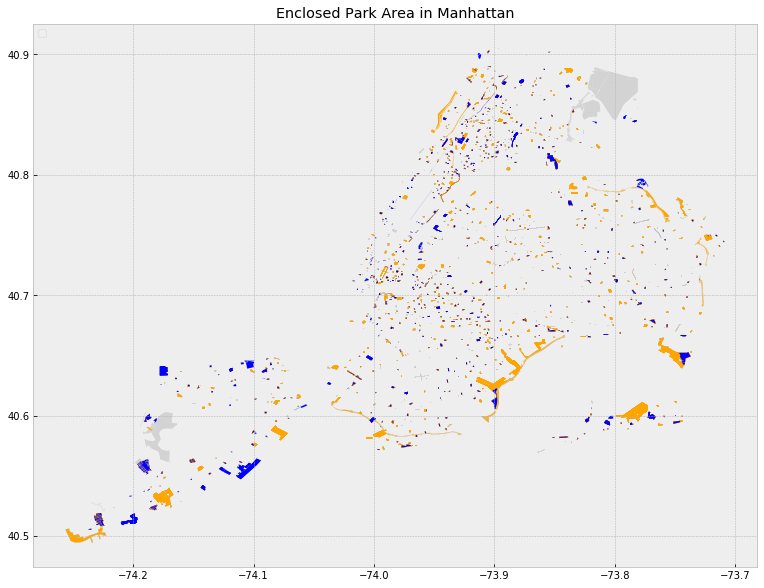

In [0]:
fig, ax = plt.subplots(figsize=(15, 10))

con_a.plot(color="lightgrey", ax=ax, legend=True)
con_u.plot(color="orange", ax=ax, legend=True)
con_n.plot(color="blue", ax=ax, legend=True)

ax.legend(loc='upper left')
plt.title("Enclosed Park Area in Manhattan")
plt.show()

# outfile = os.path.join("drive", "My Drive", "lwir", "output", "Enclosed Park Area in Manhattan.png")
# fig.savefig(outfile)

In [0]:
gpark_overall

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,47236,Fall,6,11/13/2006 12:00:00 AM,12:01 PM,12:17 PM,2006,12,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
1,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,44981,Summer,3,07/12/2006 12:00:00 AM,11:26 AM,11:50 AM,2006,3,NaN,A,A,NaN,NaN,NaN,NaN,Missing fence leading to non-parks construction site.,PIP,NaN
7,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,59421,Fall,4,10/06/2008 12:00:00 AM,12:34 PM,12:53 PM,2008,1,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,10/06/2008 04:44:00 PM
8,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,86073,Fall,2,09/25/2013 12:00:00 AM,11:05 AM,11:35 AM,2013,3,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,09/25/2013 02:13:00 PM
9,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,Seaside Wildlife Nature Park,R-03,R145,19990222000000.00000,False,Neighborhood Park,DPR,6367,503,Seaside Wildlife Nature Park,R-03,Yes,R-03,122,Y,R145,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 40.54213, -74.14217 40.54214, -74.14112 40.54139, ...",R145,03,68504,Summer,2,06/09/2010 12:00:00 AM,10:38 AM,11:04 AM,2010,3,NaN,A,A,NaN,NaN,NaN,Partial Constr./Rest of Site Rated.,New playground being constructed at eastern end.,PIP,06/09/2010 02:43:00 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
gpark_overall = gpark.groupby(["Overall Condition", "geometry"]).sum()
display(gpark_overall.dropna())

KeyboardInterrupt: ignored

In [0]:

pop_boro = gp.read_file("drive/My Drive/group_three_final_project/data/popultion_boro/tl_2010_36_zcta510.shp")
pop = pd.read_csv("drive/My Drive/group_three_final_project/data/population/ACS_17_5YR_S0101_with_ann.csv", skiprows=1)

In [177]:
pop_boro.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,36,12205,3612205,B5,G6350,S,40906445,243508,+42.7187855,-073.8292399,N,"POLYGON ((-73.87052 42.75123, -73.86861 42.75655, -73.86841 42.75656, -73.86815 42.75654, -73.86..."
1,36,12009,3612009,B5,G6350,S,135241924,2168637,+42.6975663,-074.0355422,N,"POLYGON ((-74.10891 42.65300, -74.10889 42.65334, -74.10880 42.65381, -74.10858 42.65464, -74.10..."
2,36,14804,3614804,B5,G6350,S,144718714,232123,+42.3172588,-077.8479358,N,"POLYGON ((-77.92747 42.34775, -77.92632 42.34776, -77.92336 42.34778, -77.91920 42.34781, -77.91..."
3,36,14836,3614836,B5,G6350,S,77612958,131305,+42.5429182,-077.8781933,N,"MULTIPOLYGON (((-77.95599 42.47433, -77.95600 42.46633, -77.95600 42.46474, -77.95448 42.46473, ..."
4,36,14536,3614536,B5,G6350,S,47193482,425175,+42.5439751,-078.0836709,N,"POLYGON ((-78.05030 42.53850, -78.05024 42.53852, -78.05008 42.53858, -78.05003 42.53860, -78.04..."


In [178]:
pop.head()

,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Percent; Estimate; Total population,Percent; Margin of Error; Total population,Male; Estimate; Total population,Male; Margin of Error; Total population,Percent Male; Estimate; Total population,Percent Male; Margin of Error; Total population,Female; Estimate; Total population,Female; Margin of Error; Total population,Percent Female; Estimate; Total population,Percent Female; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Percent; Estimate; AGE - Under 5 years,Percent; Margin of Error; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Male; Margin of Error; AGE - Under 5 years,Percent Male; Estimate; AGE - Under 5 years,Percent Male; Margin of Error; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Female; Margin of Error; AGE - Under 5 years,Percent Female; Estimate; AGE - Under 5 years,Percent Female; Margin of Error; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Total; Margin of Error; AGE - 5 to 9 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Margin of Error; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Male; Margin of Error; AGE - 5 to 9 years,Percent Male; Estimate; AGE - 5 to 9 years,Percent Male; Margin of Error; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Female; Margin of Error; AGE - 5 to 9 years,Percent Female; Estimate; AGE - 5 to 9 years,Percent Female; Margin of Error; AGE - 5 to 9 years,Total; Estimate; AGE - 10 to 14 years,Total; Margin of Error; AGE - 10 to 14 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Margin of Error; AGE - 10 to 14 years,Male; Estimate; AGE - 10 to 14 years,Male; Margin of Error; AGE - 10 to 14 years,Percent Male; Estimate; AGE - 10 to 14 years,Percent Male; Margin of Error; AGE - 10 to 14 years,Female; Estimate; AGE - 10 to 14 years,Female; Margin of Error; AGE - 10 to 14 years,Percent Female; Estimate; AGE - 10 to 14 years,Percent Female; Margin of Error; AGE - 10 to 14 years,Total; Estimate; AGE - 15 to 19 years,Total; Margin of Error; AGE - 15 to 19 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Margin of Error; AGE - 15 to 19 years,Male; Estimate; AGE - 15 to 19 years,Male; Margin of Error; AGE - 15 to 19 years,Percent Male; Estimate; AGE - 15 to 19 years,Percent Male; Margin of Error; AGE - 15 to 19 years,Female; Estimate; AGE - 15 to 19 years,Female; Margin of Error; AGE - 15 to 19 years,Percent Female; Estimate; AGE - 15 to 19 years,Percent Female; Margin of Error; AGE - 15 to 19 years,Total; Estimate; AGE - 20 to 24 years,Total; Margin of Error; AGE - 20 to 24 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Margin of Error; AGE - 20 to 24 years,Male; Estimate; AGE - 20 to 24 years,Male; Margin of Error; AGE - 20 to 24 years,Percent Male; Estimate; AGE - 20 to 24 years,Percent Male; Margin of Error; AGE - 20 to 24 years,Female; Estimate; AGE - 20 to 24 years,Female; Margin of Error; AGE - 20 to 24 years,Percent Female; Estimate; AGE - 20 to 24 years,Percent Female; Margin of Error; AGE - 20 to 24 years,Total; Estimate; AGE - 25 to 29 years,Total; Margin of Error; AGE - 25 to 29 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Margin of Error; AGE - 25 to 29 years,Male; Estimate; AGE - 25 to 29 years,Male; Margin of Error; AGE - 25 to 29 years,Percent Male; Estimate; AGE - 25 to 29 years,Percent Male; Margin of Error; AGE - 25 to 29 years,Female; Estimate; AGE - 25 to 29 years,Female; Margin of Error; AGE - 25 to 29 years,Percent Female; Estimate; AGE - 25 to 29 years,Percent Female; Margin of Error; AGE - 25 to 29 years,Total; Estimate; AGE - 30 to 34 years,Total; Margin of Error; AGE - 30 to 34 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Margin of Error; AGE - 30 to 34 years,Male; Estimate; AGE - 30 to 34 years,Male; Margin of Error; AGE - 30 to 34 years,Percent Male; Estimate; AGE - 30 to 34 years,Percent Male; Margin of Error; A

In [194]:
pop['zipcode'].dtypes

dtype('int64')

In [0]:
pop_boro['ZCTA5CE10'] = pop_boro['ZCTA5CE10'].astype(int)

In [0]:
pop_merged = pop_boro.merge(pop, left_on="ZCTA5CE10", right_on="zipcode")

In [199]:
pop_merged.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Percent; Estimate; Total population,Percent; Margin of Error; Total population,Male; Estimate; Total population,Male; Margin of Error; Total population,Percent Male; Estimate; Total population,Percent Male; Margin of Error; Total population,Female; Estimate; Total population,Female; Margin of Error; Total population,Percent Female; Estimate; Total population,Percent Female; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Percent; Estimate; AGE - Under 5 years,Percent; Margin of Error; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Male; Margin of Error; AGE - Under 5 years,Percent Male; Estimate; AGE - Under 5 years,Percent Male; Margin of Error; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Female; Margin of Error; AGE - Under 5 years,Percent Female; Estimate; AGE - Under 5 years,Percent Female; Margin of Error; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Total; Margin of Error; AGE - 5 to 9 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Margin of Error; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Male; Margin of Error; AGE - 5 to 9 years,Percent Male; Estimate; AGE - 5 to 9 years,Percent Male; Margin of Error; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Female; Margin of Error; AGE - 5 to 9 years,Percent Female; Estimate; AGE - 5 to 9 years,Percent Female; Margin of Error; AGE - 5 to 9 years,Total; Estimate; AGE - 10 to 14 years,Total; Margin of Error; AGE - 10 to 14 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Margin of Error; AGE - 10 to 14 years,Male; Estimate; AGE - 10 to 14 years,Male; Margin of Error; AGE - 10 to 14 years,Percent Male; Estimate; AGE - 10 to 14 years,Percent Male; Margin of Error; AGE - 10 to 14 years,Female; Estimate; AGE - 10 to 14 years,Female; Margin of Error; AGE - 10 to 14 years,Percent Female; Estimate; AGE - 10 to 14 years,Percent Female; Margin of Error; AGE - 10 to 14 years,Total; Estimate; AGE - 15 to 19 years,Total; Margin of Error; AGE - 15 to 19 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Margin of Error; AGE - 15 to 19 years,Male; Estimate; AGE - 15 to 19 years,Male; Margin of Error; AGE - 15 to 19 years,Percent Male; Estimate; AGE - 15 to 19 years,Percent Male; Margin of Error; AGE - 15 to 19 years,Female; Estimate; AGE - 15 to 19 years,Female; Margin of Error; AGE - 15 to 19 years,Percent Female; Estimate; AGE - 15 to 19 years,Percent Female; Margin of Error; AGE - 15 to 19 years,Total; Estimate; AGE - 20 to 24 years,Total; Margin of Error; AGE - 20 to 24 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Margin of Error; AGE - 20 to 24 years,Male; Estimate; AGE - 20 to 24 years,Male; Margin of Error; AGE - 20 to 24 years,Percent Male; Estimate; AGE - 20 to 24 years,Percent Male; Margin of Error; AGE - 20 to 24 years,Female; Estimate; AGE - 20 to 24 years,Female; Margin of Error; AGE - 20 to 24 years,Percent Female; Estimate; AGE - 20 to 24 years,Percent Female; Margin of Error; AGE - 20 to 24 years,Total; Estimate; AGE - 25 to 29 years,Total; Margin of Error; AGE - 25 to 29 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Margin of Error; AGE - 25 to 29 years,Male; Estimate; AGE - 25 to 29 years,Male; Margin of Error; AGE - 25 to 29 years,Percent Male; Estimate; AGE - 25 to 29 years,Percent Male; Margin of Error; AGE - 25 to 29 years,Female; Estimate; AGE - 25 to 29 years,Female; Margin of Error; AGE - 25 to 29 years,Percent Female; Estimate; AGE - 25 to 29 years,Percent Female; Margin of Error; AGE - 25 to 29 years,Total; Estimate; AGE - 30 to 34 years,Total; Margin of Error; AGE - 30 to 34 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Margin of Error; AGE - 30 to 34 years,Male; Estimate; AGE - 30 to 34 years,Male; 

In [0]:
pop_ny = pop_merged[pop_merged.isin(gpark['zipcode'])]

In [0]:
pop_ny.groupby(["ZCTA5CE10"]).count()

,STATEFP10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,HC04_MOE_VC01,HC05_EST_VC01,HC05_MOE_VC01,HC06_EST_VC01,HC06_MOE_VC01,HC01_EST_VC03,HC01_MOE_VC03,HC02_EST_VC03,HC02_MOE_VC03,HC03_EST_VC03,HC03_MOE_VC03,HC04_EST_VC03,HC04_MOE_VC03,HC05_EST_VC03,HC05_MOE_VC03,HC06_EST_VC03,HC06_MOE_VC03,HC01_EST_VC04,HC01_MOE_VC04,HC02_EST_VC04,HC02_MOE_VC04,HC03_EST_VC04,HC03_MOE_VC04,HC04_EST_VC04,HC04_MOE_VC04,HC05_EST_VC04,HC05_MOE_VC04,HC06_EST_VC04,HC06_MOE_VC04,HC01_EST_VC05,HC01_MOE_VC05,HC02_EST_VC05,HC02_MOE_VC05,HC03_EST_VC05,HC03_MOE_VC05,HC04_EST_VC05,HC04_MOE_VC05,HC05_EST_VC05,HC05_MOE_VC05,HC06_EST_VC05,HC06_MOE_VC05,HC01_EST_VC06,HC01_MOE_VC06,HC02_EST_VC06,HC02_MOE_VC06,HC03_EST_VC06,HC03_MOE_VC06,HC04_EST_VC06,HC04_MOE_VC06,HC05_EST_VC06,HC05_MOE_VC06,HC06_EST_VC06,HC06_MOE_VC06,HC01_EST_VC07,HC01_MOE_VC07,HC02_EST_VC07,HC02_MOE_VC07,HC03_EST_VC07,HC03_MOE_VC07,HC04_EST_VC07,HC04_MOE_VC07,HC05_EST_VC07,HC05_MOE_VC07,HC06_EST_VC07,HC06_MOE_VC07,HC01_EST_VC08,HC01_MOE_VC08,HC02_EST_VC08,HC02_MOE_VC08,HC03_EST_VC08,HC03_MOE_VC08,HC04_EST_VC08,HC04_MOE_VC08,HC05_EST_VC08,HC05_MOE_VC08,HC06_EST_VC08,HC06_MOE_VC08,HC01_EST_VC09,HC01_MOE_VC09,HC02_EST_VC09,HC02_MOE_VC09,HC03_EST_VC09,HC03_MOE_VC09,HC04_EST_VC09,HC04_MOE_VC09,HC05_EST_VC09,HC05_MOE_VC09,HC06_EST_VC09,HC06_MOE_VC09,HC01_EST_VC10,HC01_MOE_VC10,HC02_EST_VC10,HC02_MOE_VC10,HC03_EST_VC10,HC03_MOE_VC10,HC04_EST_VC10,HC04_MOE_VC10,HC05_EST_VC10,HC05_MOE_VC10,HC06_EST_VC10,HC06_MOE_VC10,HC01_EST_VC11,HC01_MOE_VC11,HC02_EST_VC11,HC02_MOE_VC11,HC03_EST_VC11,HC03_MOE_VC11,HC04_EST_VC11,HC04_MOE_VC11,HC05_EST_VC11,HC05_MOE_VC11,HC06_EST_VC11,HC06_MOE_VC11,HC01_EST_VC12,HC01_MOE_VC12,HC02_EST_VC12,HC02_MOE_VC12,HC03_EST_VC12,HC03_MOE_VC12,HC04_EST_VC12,HC04_MOE_VC12,HC05_EST_VC12,HC05_MOE_VC12,HC06_EST_VC12,HC06_MOE_VC12,HC01_EST_VC13,HC01_MOE_VC13,HC02_EST_VC13,HC02_MOE_VC13,HC03_EST_VC13,HC03_MOE_VC13,HC04_EST_VC13,HC04_MOE_VC13,HC05_EST_VC13,HC05_MOE_VC13,HC06_EST_VC13,HC06_MOE_VC13,HC01_EST_VC14,HC01_MOE_VC14,HC02_EST_VC14,HC02_MOE_VC14,HC03_EST_VC14,HC03_MOE_VC14,HC04_EST_VC14,HC04_MOE_VC14,HC05_EST_VC14,HC05_MOE_VC14,HC06_EST_VC14,HC06_MOE_VC14,HC01_EST_VC15,HC01_MOE_VC15,HC02_EST_VC15,HC02_MOE_VC15,HC03_EST_VC15,HC03_MOE_VC15,HC04_EST_VC15,HC04_MOE_VC15,HC05_EST_VC15,HC05_MOE_VC15,HC06_EST_VC15,HC06_MOE_VC15,HC01_EST_VC16,HC01_MOE_VC16,HC02_EST_VC16,HC02_MOE_VC16,HC03_EST_VC16,HC03_MOE_VC16,HC04_EST_VC16,HC04_MOE_VC16,HC05_EST_VC16,HC05_MOE_VC16,HC06_EST_VC16,HC06_MOE_VC16,HC01_EST_VC17,HC01_MOE_VC17,HC02_EST_VC17,HC02_MOE_VC17,HC03_EST_VC17,HC03_MOE_VC17,HC04_EST_VC17,HC04_MOE_VC17,HC05_EST_VC17,HC05_MOE_VC17,HC06_EST_VC17,HC06_MOE_VC17,HC01_EST_VC18,HC01_MOE_VC18,HC02_EST_VC18,HC02_MOE_VC18,HC03_EST_VC18,HC03_MOE_VC18,HC04_EST_VC18,HC04_MOE_VC18,HC05_EST_VC18,HC05_MOE_VC18,HC06_EST_VC18,HC06_MOE_VC18,HC01_EST_VC19,HC01_MOE_VC19,HC02_EST_VC19,HC02_MOE_VC19,HC03_EST_VC19,HC03_MOE_VC19,HC04_EST_VC19,HC04_MOE_VC19,HC05_EST_VC19,HC05_MOE_VC19,HC06_EST_VC19,HC06_MOE_VC19,HC01_EST_VC20,HC01_MOE_VC20,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20,HC05_EST_VC20,HC05_MOE_VC20,HC06_EST_VC20,HC06_MOE_VC20,HC01_EST_VC23,HC01_MOE_VC23,HC02_EST_VC23,HC02_MOE_VC23,HC03_EST_VC23,HC03_MOE_VC23,HC04_EST_VC23,HC04_MOE_VC23,HC05_EST_VC23,HC05_MOE_VC23,HC06_EST_VC23,HC06_MOE_VC23,HC01_EST_VC24,HC01_MOE_VC24,HC02_EST_VC24,HC02_MOE_VC24,HC03_EST_VC24,HC03_MOE_VC24,HC04_EST_VC24,HC04_MOE_VC24,HC05_EST_VC24,HC05_MOE_VC24,HC06_EST_VC24,HC06_MOE_VC24,HC01_EST_VC25,HC01_MOE_VC25,HC02_EST_VC25,HC02_MOE_VC25,HC03_EST_VC25,HC03_MOE_VC25,HC04_EST_VC25,HC04_MOE_VC25,HC05_EST_VC25,HC05_MOE_VC25,HC06_EST_VC25,HC06_MOE_VC25,HC01_EST_VC26,HC01_MOE_VC26,HC02_EST_VC26,HC02_MOE_VC26,HC03_EST_VC26,HC03_MOE_VC26,HC04_EST_VC26,HC04_MOE_VC26,HC05_EST_VC26,HC05_MOE_VC26,HC06_EST_VC26,HC06_MOE_VC

In [0]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(15, 10))

gpark.dropna().plot('Overall Condition', ax=ax, legend=True)
#burr.plot(color="lightgreen", ax=ax)
df.plot.scatter(x='Station_Longitude', y='Station_Latitude', ax=ax)

ax.set_title('Overall Condition')
ax.axis("equal")

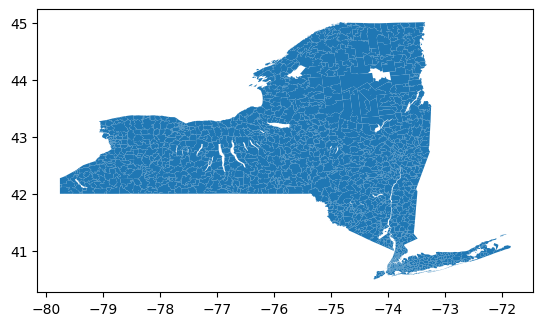

In [200]:
pop_merged.plot('')